In [115]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols, glm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
#import the merged data set
HumanA= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv')
HumanA.dropna(axis=0, inplace=True)
HumanAf = HumanA[HumanA['ID'] != 4623]

In [117]:
# Define probability distribution for the response variable for the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

## Order effects

Text(0.5, 0, 'Residuals')

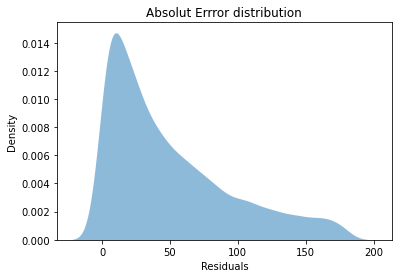

In [118]:
#Plotting KDE for first independent variable
ax = sns.kdeplot(x='AbsolutError', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Absolut Errror distribution")
ax.set_xlabel("Residuals")

Text(0.5, 0, 'Residuals')

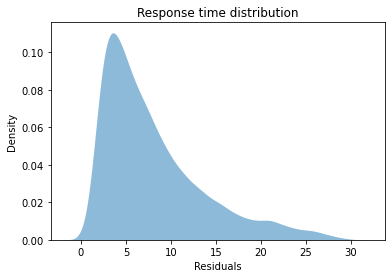

In [119]:
#Plotting KDE for second independent variable
ax = sns.kdeplot(x='RT', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Response time distribution")
ax.set_xlabel("Residuals")

In [120]:
# Response time predicted by trial order in each starting location
formula = 'np.log(RT) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                           MixedLM                Dependent Variable:                np.log(RT)
No. Observations:                8713                   Method:                            REML      
No. Groups:                      26                     Scale:                             0.3320    
Min. group size:                 329                    Log-Likelihood:                    -7643.6524
Max. group size:                 336                    Converged:                         Yes       
Mean group size:                 335.1                                                               
-----------------------------------------------------------------------------------------------------
                                                            Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------
Intercept   

Text(0.5, 17.200000000000003, 'Residuals')

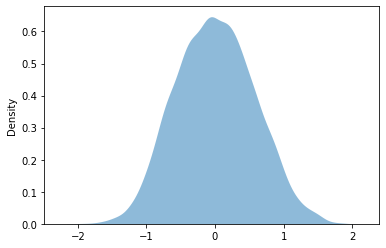

In [121]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

### CONCLUSION
__________________
Subjects are **significantly** slower on the first three trials in each pointing position.

In [122]:
# Response time predicted by trial order in each starting location
formula = 'np.log(AbsolutError) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             np.log(AbsolutError)
No. Observations:             8713                Method:                         REML                
No. Groups:                   26                  Scale:                          1.7278              
Min. group size:              329                 Log-Likelihood:                 -14809.7938         
Max. group size:              336                 Converged:                      Yes                 
Mean group size:              335.1                                                                   
------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

### Result
__________________
Subjects do not significantly differ in their precision across time spent at pointing position.


Text(0.5, 17.200000000000003, 'Residuals')

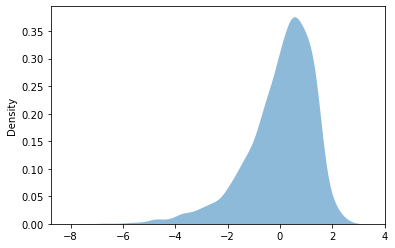

In [123]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [124]:
# Response time predicted by trial order at the overall test
formula = 'np.log(AbsolutError) ~ C(StartPointID, Treatment(reference=14))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                           Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         np.log(AbsolutError)
No. Observations:          8713            Method:                     REML                
No. Groups:                26              Scale:                      1.7213              
Min. group size:           329             Log-Likelihood:             -14807.1922         
Max. group size:           336             Converged:                  Yes                 
Mean group size:           335.1                                                           
-------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------
Intercept                                         3.289    0.112 29.299 0.000  3.069  3.509
C(StartPointID,

### Result
__________________
Subjects are in average 1.5 seconds slower during  the first 10 trials


In [125]:
# Response time predicted by trial order for the overall test
formula = 'RT ~ C(StartPointID, Treatment(reference=27))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            RT         
No. Observations:            8713               Method:                        REML       
No. Groups:                  26                 Scale:                         25.1555    
Min. group size:             329                Log-Likelihood:                -26458.4484
Max. group size:             336                Converged:                     Yes        
Mean group size:             335.1                                                        
------------------------------------------------------------------------------------------
                                                 Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                        5.998    0.482 12.456 0.000  5.054  6.942
C(StartPointID, Treatment(

### Result
__________________
Subjects accuracy does not increase throughout the task


### CONCLUSION
__________________
Subjects accuracy does not improve through the task, but their responsable does. This could be evidence of a learning effect of the testing format that does not enhance their performance. Their knwoledge is stable throughout.

## The two factor interaction: Meaningfulness*Presence

In [126]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory) + C(Context, Treatment(reference=False))*C(AvatarPresenceCategory)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                            Mixed Linear Model Regression Results
Model:                                MixedLM                     Dependent Variable:                     np.log(AbsolutError)
No. Observations:                     8713                        Method:                                 REML                
No. Groups:                           26                          Scale:                                  1.7238              
Min. group size:                      329                         Log-Likelihood:                         -14789.2102         
Max. group size:                      336                         Converged:                              Yes                 
Mean group size:                      335.1                                                                                   
------------------------------------------------------------------------------------------------------------------------------
                             

In [127]:
HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]] = HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]].astype(int)
HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]] = HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]].values.astype(str)

In [128]:
HumanAf["ID_StartPointID"] =str(HumanAf['ID']) + "_" + str(HumanAf['StartPointID'])


In [129]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~  C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory)  + C(AvatarPresenceCategory)*C(Context, Treatment(reference=False))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID_StartPointID']).fit()
print(model_LM.summary())

                                            Mixed Linear Model Regression Results
Model:                                MixedLM                     Dependent Variable:                     np.log(AbsolutError)
No. Observations:                     8713                        Method:                                 REML                
No. Groups:                           1                           Scale:                                  1.9006              
Min. group size:                      8713                        Log-Likelihood:                         -15169.1648         
Max. group size:                      8713                        Converged:                              Yes                 
Mean group size:                      8713.0                                                                                  
------------------------------------------------------------------------------------------------------------------------------
                             

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [130]:
HumanAf["ID_PointingTaskStartingLocations"] = HumanAf.loc[:,"ID"] + "_" + HumanAf.loc[:,"PointingTaskStartingLocations"]

In [131]:
HumanAf["ID_PointingTaskStartingLocations"].head()

1    3572_18
2     3572_7
3    3572_22
4    3572_12
5     3572_9
Name: ID_PointingTaskStartingLocations, dtype: object

In [132]:
# Whithout global landmarks
HumanAfnoL = HumanAf[(HumanAf.avatarID != 27) | (HumanAf.avatarID != 28) | (HumanAf.avatarID != 55)| (HumanAf.avatarID != 56)]


In [133]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory) + C(Context, Treatment(reference=False)):C(AvatarPresenceCategory)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID_PointingTaskStartingLocations']).fit()
print(model_LM.summary())

                                            Mixed Linear Model Regression Results
Model:                                MixedLM                     Dependent Variable:                     np.log(AbsolutError)
No. Observations:                     8713                        Method:                                 REML                
No. Groups:                           728                         Scale:                                  1.6358              
Min. group size:                      9                           Log-Likelihood:                         -14907.7556         
Max. group size:                      12                          Converged:                              Yes                 
Mean group size:                      12.0                                                                                    
------------------------------------------------------------------------------------------------------------------------------
                             

In [134]:
from statsmodels.stats.anova import AnovaRM
print(AnovaRM(data=HumanAfnoL, depvar='RT', subject='ID', within=['Context', 'AvatarPresenceCategory'], aggregate_func = 'mean').fit())

                           Anova
                               F Value Num DF  Den DF Pr > F
------------------------------------------------------------
Context                         0.1426 1.0000 25.0000 0.7089
AvatarPresenceCategory          1.1756 1.0000 25.0000 0.2886
Context:AvatarPresenceCategory  2.4226 1.0000 25.0000 0.1322



Text(0.5, 17.200000000000003, 'Residuals')

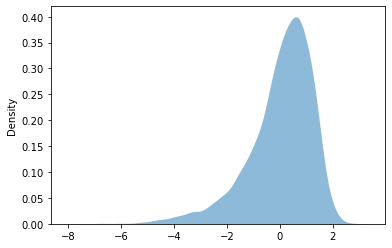

In [135]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [136]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory) + C(Context, Treatment(reference=False))*C(AvatarPresenceCategory)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                                            Mixed Linear Model Regression Results
Model:                                    MixedLM                        Dependent Variable:                        np.log(RT)
No. Observations:                         8713                           Method:                                    REML      
No. Groups:                               26                             Scale:                                     0.4054    
Min. group size:                          329                            Log-Likelihood:                            -8493.9495
Max. group size:                          336                            Converged:                                 Yes       
Mean group size:                          335.1                                                                               
------------------------------------------------------------------------------------------------------------------------------
                             

In [137]:
HumanAf.groupby('Context')['AbsolutError'].median()

Context
False    38.361116
True     31.978882
Name: AbsolutError, dtype: float64

In [138]:
HumanAf.groupby(['Context'])['RT'].std()

Context
False    5.718704
True     5.532231
Name: RT, dtype: float64

In [139]:
# Absolut error predicted by location
formula = "np.log(AbsolutError) ~ C(avatarID)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 8713    Method:             REML                
No. Groups:       26      Scale:              1.6372              
Min. group size:  329     Log-Likelihood:     -14604.2410         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.1                                           
-------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept            3.025     0.130  23.196  0.000   2.770   3.281
C(avatarID)[T.10]    0.581     0.146   3.975  0.000   0.295   0.868
C(avatarID)[T.11]   -0.121     0.146  -0.824  0.410  -0.407   0.166
C(avatarID)[T.12]    0.672     0.142   4.741  0.000   0.394   0.949
C(avatarID)[T.13]    0.367     0.144   2.545  0.011   0.084   0.649
C(

## FRS questionnaire analysis

In [140]:
# Absolut error predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(RT)
No. Observations: 8713    Method:             REML      
No. Groups:       26      Scale:              0.4058    
Min. group size:  329     Log-Likelihood:     -8494.5928
Max. group size:  336     Converged:          Yes       
Mean group size:  335.1                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.985    0.260  7.638 0.000  1.475  2.494
Global         0.037    0.061  0.607 0.544 -0.082  0.156
Overview      -0.075    0.043 -1.761 0.078 -0.158  0.008
Cardinal      -0.004    0.053 -0.075 0.940 -0.108  0.100
Group Var      0.074    0.036                           



In [141]:
# Absolut error predicted by FRS
formula = "AbsolutError ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: AbsolutError
No. Observations: 8713    Method:             REML        
No. Groups:       26      Scale:              1852.9275   
Min. group size:  329     Log-Likelihood:     -45179.8682 
Max. group size:  336     Converged:          Yes         
Mean group size:  335.1                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   67.688    12.722   5.320  0.000  42.752  92.623
Global      -3.082     2.968  -1.038  0.299  -8.900   2.736
Overview     1.123     2.082   0.539  0.590  -2.958   5.204
Cardinal    -3.894     2.606  -1.494  0.135  -9.002   1.214
Group Var  174.728     1.265                               



Text(0.5, 0, 'Residuals')

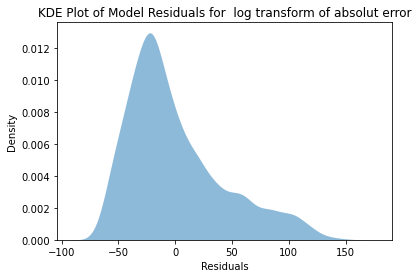

In [142]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals for  log transform of absolut error")
ax.set_xlabel("Residuals")

In [143]:
# Response Time predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(RT)
No. Observations: 8713    Method:             REML      
No. Groups:       26      Scale:              0.4058    
Min. group size:  329     Log-Likelihood:     -8494.5928
Max. group size:  336     Converged:          Yes       
Mean group size:  335.1                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.985    0.260  7.638 0.000  1.475  2.494
Global         0.037    0.061  0.607 0.544 -0.082  0.156
Overview      -0.075    0.043 -1.761 0.078 -0.158  0.008
Cardinal      -0.004    0.053 -0.075 0.940 -0.108  0.100
Group Var      0.074    0.036                           



## Avatar questionnaire analysis

In [144]:
# Response time predicted by Avatar Presence



In [145]:
# Isolating the avatar Quest variables for correlation
HumanAavatarQ = HumanAf[['remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert' ]]

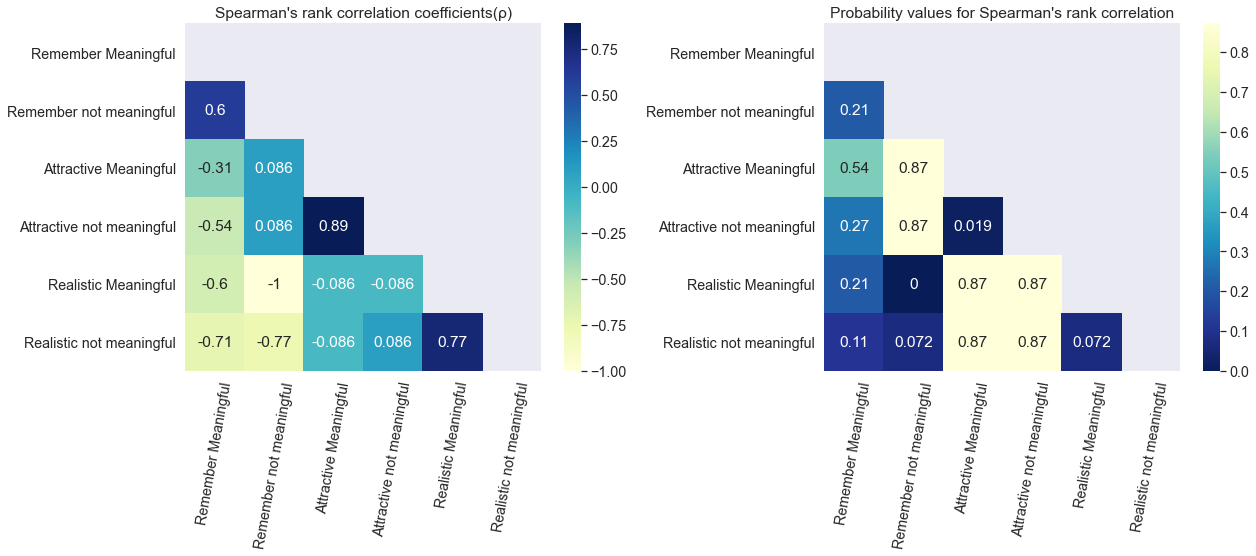

In [146]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()

fig, ax = plt.subplots(nrows=1,ncols=2)

#Calculates pearsons r matrix
corrMatrix = HumanAavatarQ.corr()
#Creates a mask that eliminates the 1s
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
#Calculates spearmans s
cor, pval = stats.spearmanr(corrMatrix.T)
#Heatmap plotting
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")
#sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask,ax=[2])

for ax in ax.ravel():
    ax.set_xticklabels(['Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful'], rotation=80);
    ax.set_yticklabels(['Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful'], rotation=360);
plt.tight_layout()
plt.show()

In [147]:
stats.spearmanr(HumanAavatarQ.remember_standing_likert, HumanAavatarQ.remember_action_likert)


SpearmanrResult(correlation=0.6224918581777719, pvalue=0.0)

In [148]:
HumanAavatarQ.head()

,remember_action_likert,remember_standing_likert,attractive_action_likert,attractive_standing_likert,realistic_action_likert,realistic_standing_likert
1,2.25,1.714286,2.607143,2.607143,2.964286,2.678571
2,2.25,1.714286,2.607143,2.607143,2.964286,2.678571
3,2.25,1.714286,2.607143,2.607143,2.964286,2.678571
4,2.25,1.714286,2.607143,2.607143,2.964286,2.678571
5,2.25,1.714286,2.607143,2.607143,2.964286,2.678571


## Calculating a factorial analysis on the questionnaire

In [149]:
AvatarQuest= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/AvatarQuestcsv.csv')
AvatarQuest.drop('Unnamed: 0', axis=1, inplace=True)
AvatarQuest.head()

,ID,Atractive 1,Atractive 2,Atractive 3,Atractive 4,Atractive 5,Atractive 6,Atractive 7,Atractive 8,Atractive 9,...,Remember 47,Remember 48,Remember 49,Remember 50,Remember 51,Remember 52,Remember 53,Remember 54,Remember 55,Remember 56
0,365,1,3,2,2,3,4,2,2,5,...,1,1,1,1,1,1,1,1,1,1
1,479,1,1,1,1,1,1,1,1,1,...,1,3,1,5,3,2,2,1,3,3
2,1754,3,4,4,3,5,4,3,3,4,...,1,2,1,1,1,1,1,1,1,1
3,2258,2,2,2,2,2,3,2,2,2,...,2,2,2,1,1,2,1,1,2,3
4,2693,1,4,2,1,1,2,1,1,3,...,1,1,1,1,1,1,1,1,1,1


In [150]:
b = list(range(1,57))
Attractive= AvatarQuest.iloc[: , b].copy()
Attractive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Atractive 1   29 non-null     int64
 1   Atractive 2   29 non-null     int64
 2   Atractive 3   29 non-null     int64
 3   Atractive 4   29 non-null     int64
 4   Atractive 5   29 non-null     int64
 5   Atractive 6   29 non-null     int64
 6   Atractive 7   29 non-null     int64
 7   Atractive 8   29 non-null     int64
 8   Atractive 9   29 non-null     int64
 9   Atractive 10  29 non-null     int64
 10  Atractive 11  29 non-null     int64
 11  Atractive 12  29 non-null     int64
 12  Atractive 13  29 non-null     int64
 13  Atractive 14  29 non-null     int64
 14  Atractive 15  29 non-null     int64
 15  Atractive 16  29 non-null     int64
 16  Atractive 17  29 non-null     int64
 17  Atractive 18  29 non-null     int64
 18  Atractive 19  29 non-null     int64
 19  Atractive 20  29 non-null     i

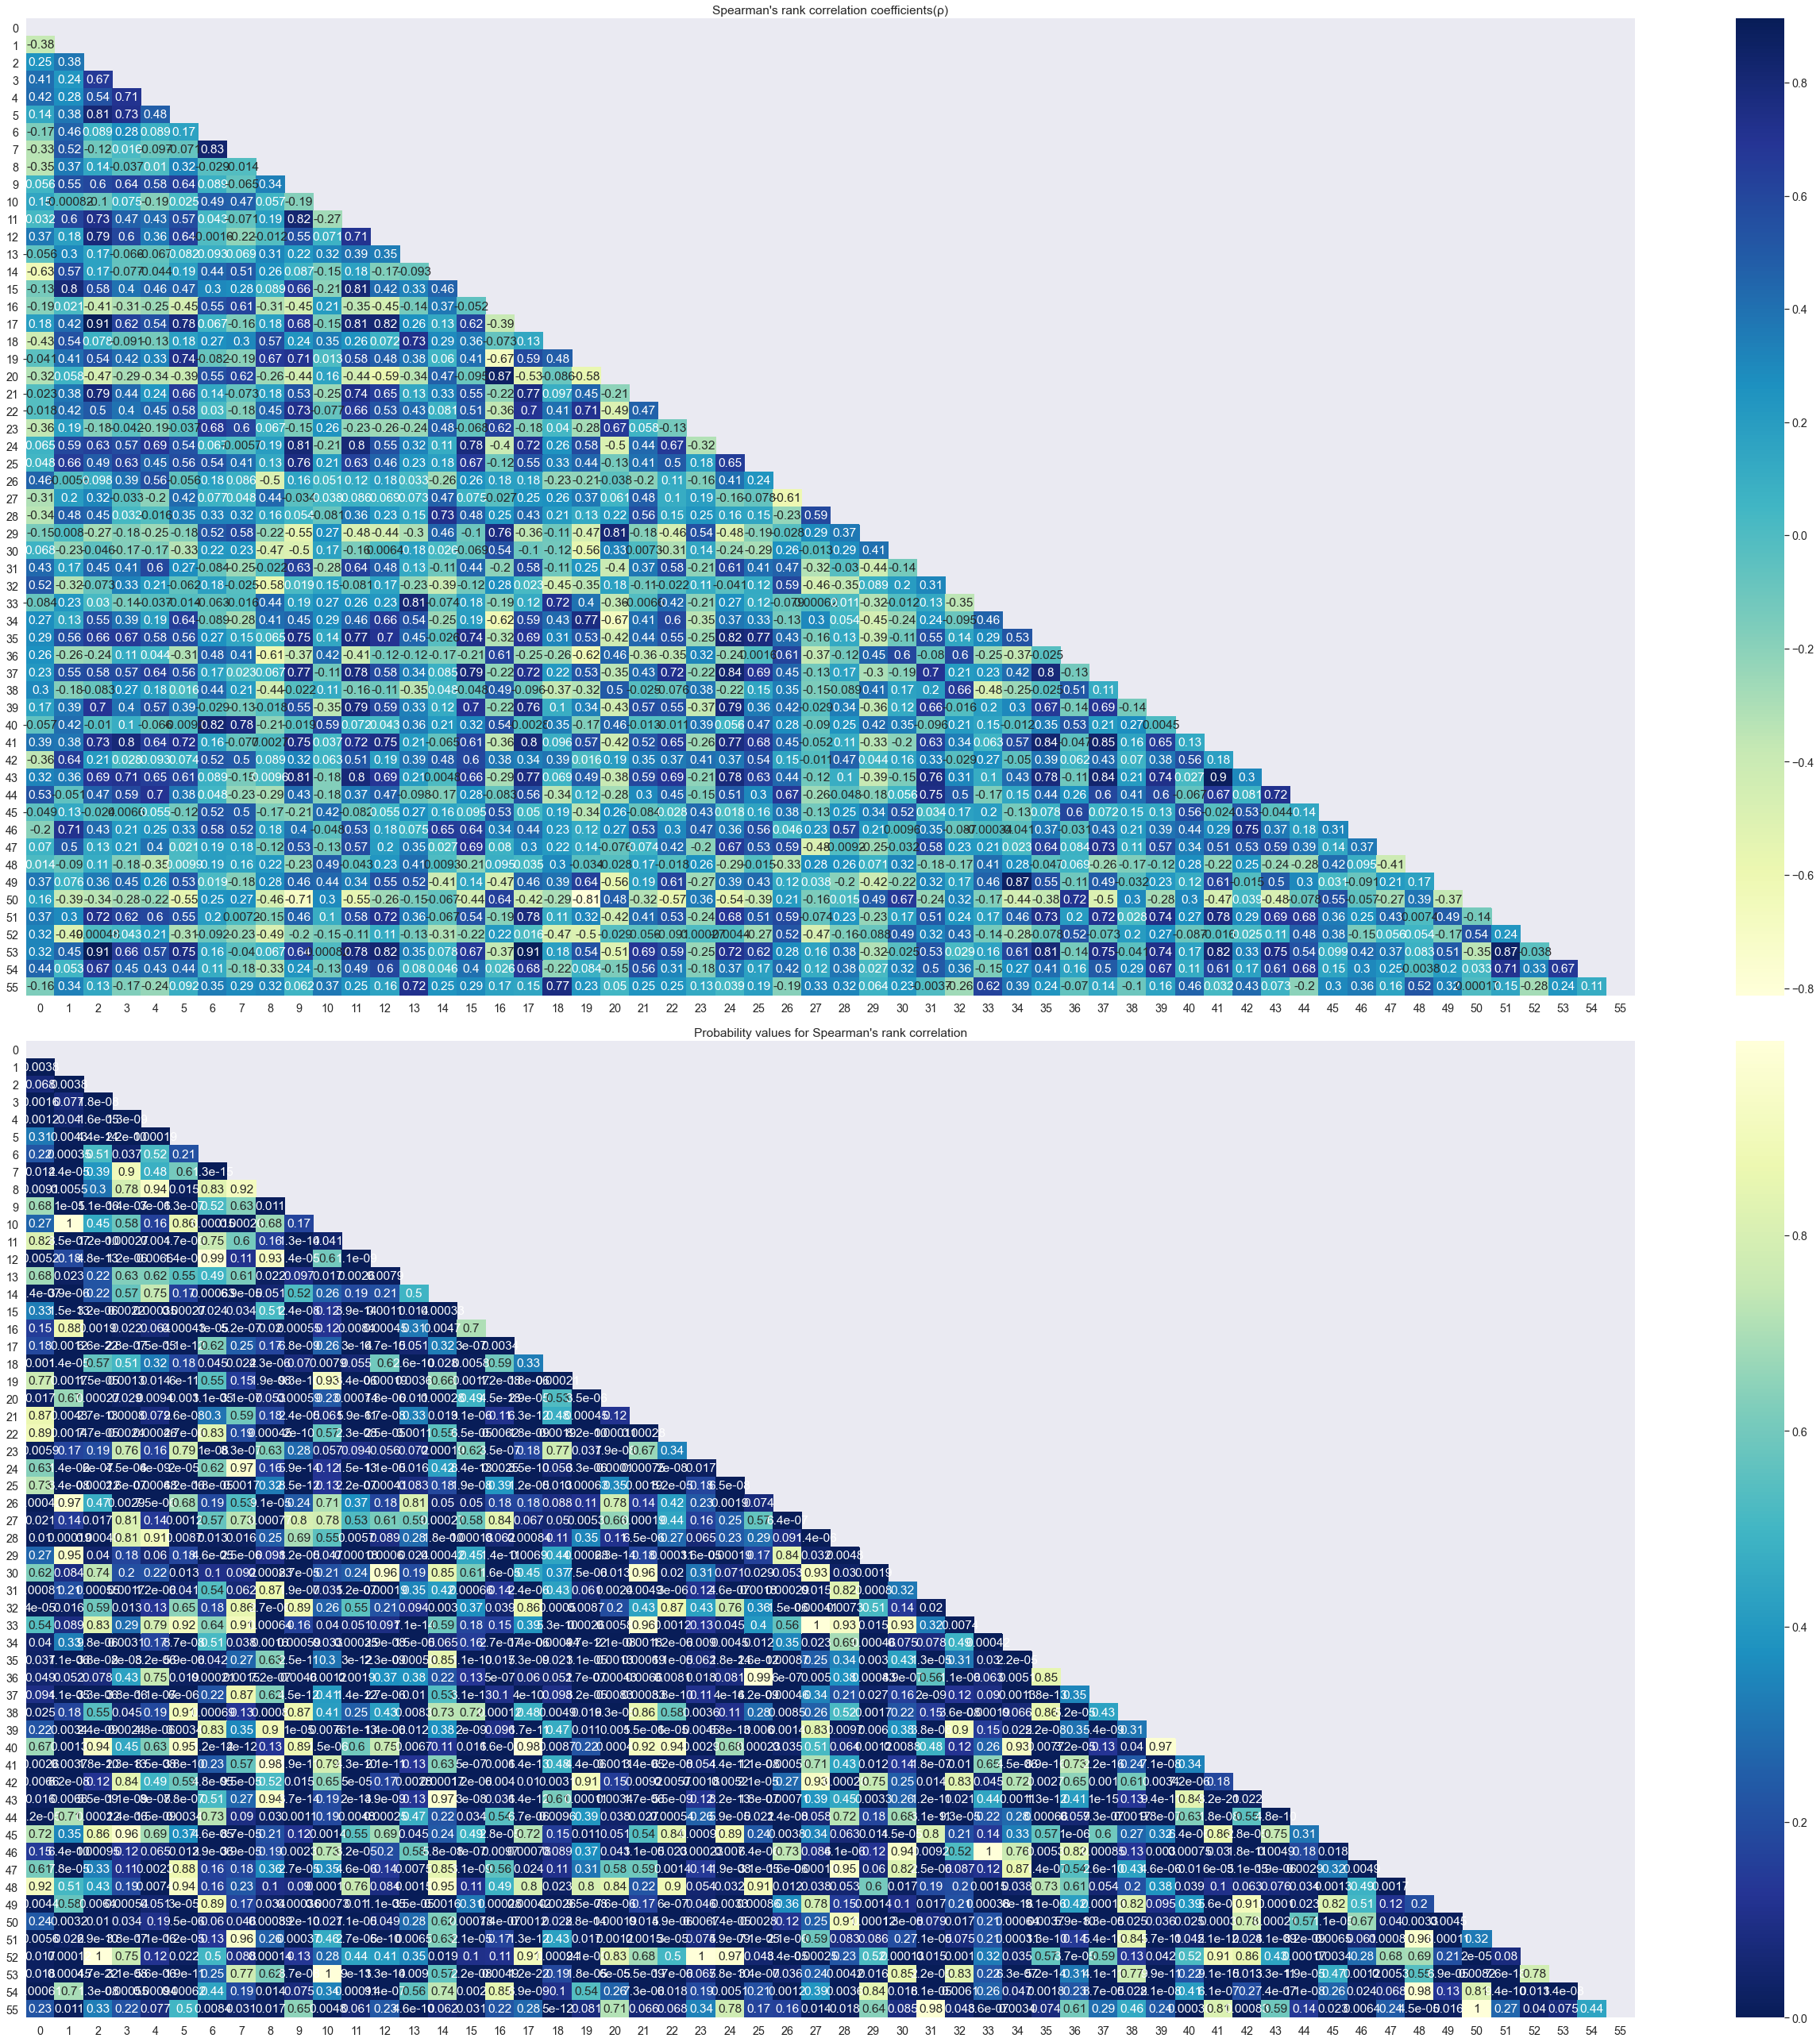

In [151]:
sns.set(rc={"figure.figsize":(36, 36)})
sns.set(font_scale = 1.3)
from matplotlib import cm
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()

fig, ax = plt.subplots(nrows=2,ncols=1)

#Calculates pearsons r matrix
corrMatrix = Attractive.corr()
#Creates a mask that eliminates the 1s
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
#Calculates spearmans s
cor, pval = stats.spearmanr(corrMatrix.T)
#Heatmap plotting
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")
#sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask,ax=[2])
plt.tight_layout()
plt.show()

In [152]:
corrMatrix.T

,Atractive 1,Atractive 2,Atractive 3,Atractive 4,Atractive 5,Atractive 6,Atractive 7,Atractive 8,Atractive 9,Atractive 10,...,Atractive 47,Atractive 48,Atractive 49,Atractive 50,Atractive 51,Atractive 52,Atractive 53,Atractive 54,Atractive 55,Atractive 56
Atractive 1,1.000000,0.011605,0.296417,0.273055,0.467265,0.182068,0.148795,0.037637,0.015231,0.132075,...,0.265894,0.201804,0.258758,0.334698,0.420092,3.010399e-01,0.182574,0.428347,0.368399,0.145966
Atractive 2,0.011605,1.000000,0.377898,0.236445,0.288248,0.372214,0.509030,0.492239,0.374385,0.442429,...,0.670793,0.438952,0.147297,0.180287,0.067224,3.493621e-01,-0.243663,0.432725,0.303527,0.395737
Atractive 3,0.296417,0.377898,1.000000,0.535376,0.478704,0.720825,0.444668,0.242950,0.199962,0.396248,...,0.514540,0.025100,0.336238,0.328151,0.267226,6.897259e-01,0.183008,0.773460,0.726507,0.381035
Atractive 4,0.273055,0.236445,0.535376,1.000000,0.700078,0.613095,0.548971,0.417955,0.254660,0.625306,...,0.408985,0.213147,0.290396,0.410662,0.278412,5.058482e-01,0.259916,0.514752,0.468327,0.193086
Atractive 5,0.467265,0.288248,0.478704,0.700078,1.000000,0.483194,0.489182,0.272128,0.368900,0.488590,...,0.470953,0.324529,0.138522,0.297280,0.327103,5.134553e-01,0.333025,0.544949,0.402995,0.178774
Atractive 6,0.182068,0.372214,0.720825,0.613095,0.483194,1.000000,0.536729,0.290595,0.280067,0.517849,...,0.451873,0.067185,0.281266,0.533347,-0.036485,5.963299e-01,-0.005319,0.693457,0.489505,0.297466
Atractive 7,0.148795,0.509030,0.444668,0.548971,0.489182,0.536729,1.000000,0.760532,0.268023,0.448930,...,0.626669,0.262600,0.414467,0.430116,0.421332,5.193431e-01,0.091866,0.581484,0.461189,0.517559
Atractive 8,0.037637,0.492239,0.242950,0.417955,0.272128,0.290595,0.760532,1.000000,0.229706,0.357488,...,0.608884,0.285320,0.348636,0.243055,0.403753,4.335071e-01,0.003984,0.453662,0.248462,0.461047
Atractive 9,0.015231,0.374385,0.199962,0.254660,0.368900,0.280067,0.268023,0.229706,1.000000,0.391466,...,0.327485,0.005621,0.233368,0.337041,0.129721,3.668219e-02,-0.077864,0.177120,0.091660,0.338315
Atractive 10,0.132075,0.442429,0.396248,0.625306,0.488590,0.517849,0.448930,0.357488,0.391466,1.000000,...,0.532684,0.459384,0.174755,0.443633,-0.093886,3.868539e-01,0.093413,0.497812,0.267690,0.317945


<ipython-input-153-5d2b43fc8427>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HumanAavatarQ.dropna(inplace=True);


33961.70911314356 0.0
0.3871364891392994


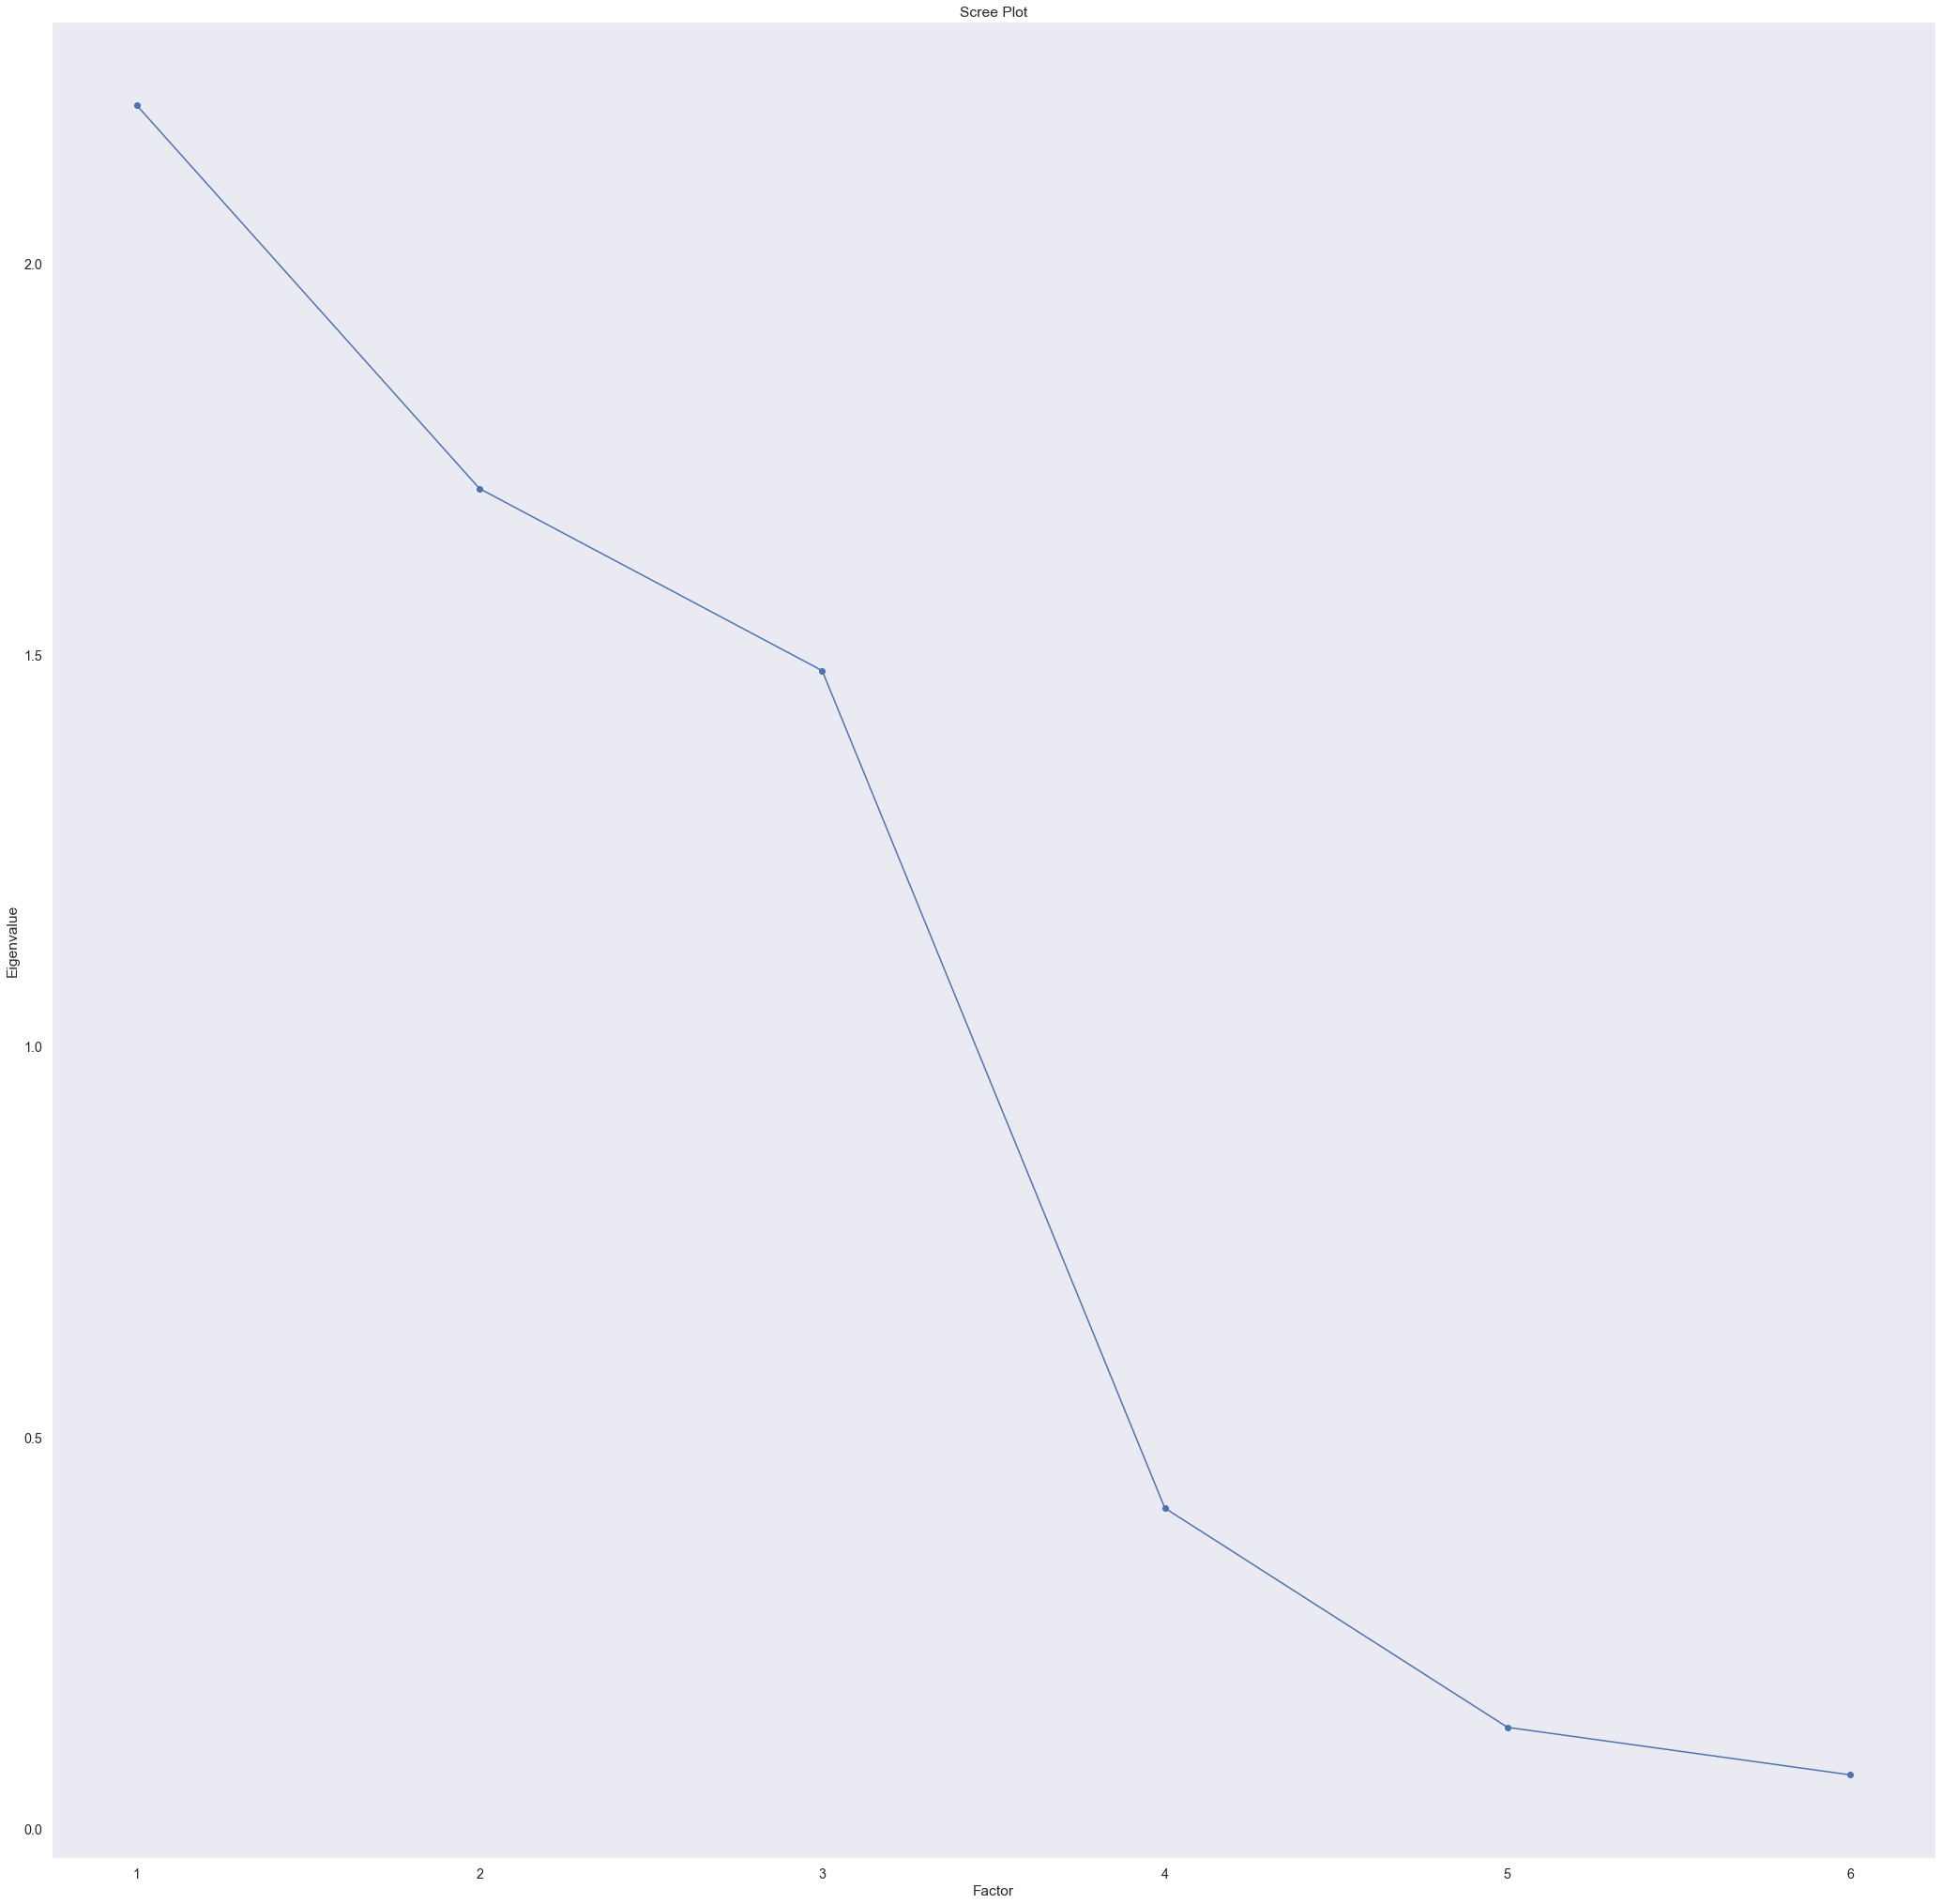

In [153]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Droppin Nas
HumanAavatarQ.dropna(inplace=True);

#Adecuacy test

#Barlets sphericity: A significative p value indicates the date is different from an identity matrix
chi_square_value,p_value= calculate_bartlett_sphericity(HumanAavatarQ)
print(chi_square_value,p_value)

# Kaiser-Meyer-Olkin (KMO): Estimates the proportion of variance among all observed variables, less than 0.6 is inadequate
kmo_all,kmo_model=calculate_kmo(HumanAavatarQ)
print(kmo_model)
#Create factor analysis object and perform analysis
fa= FactorAnalyzer(rotation='varimax')
fa.fit(HumanAavatarQ)

loadings = fa.loadings_

# Get the eigenvector
ev, v = fa.get_eigenvalues()

xvals = range(1, HumanAavatarQ.shape[1]+1)
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [154]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ remember_action_likert + remember_standing_likert  + attractive_action_likert + attractive_standing_likert + realistic_action_likert + realistic_standing_likert"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     np.log(RT)
No. Observations:      8713        Method:                 REML      
No. Groups:            26          Scale:                  0.4058    
Min. group size:       329         Log-Likelihood:         -8493.8036
Max. group size:       336         Converged:              Yes       
Mean group size:       335.1                                         
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   1.545    0.520  2.972 0.003  0.526  2.564
remember_action_likert      0.039    0.130  0.305 0.761 -0.215  0.294
remember_standing_likert   -0.199    0.186 -1.067 0.286 -0.564  0.166
attractive_action_likert    0.365    0.246  1.483 0.138 -0.118  0.848
attractive_standing_likert -0.323   

In [155]:
import random
number = random.randint(1000,9999)
print(number)

2026


In [156]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ ContextQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 8713    Method:             REML                
No. Groups:       26      Scale:              1.7271              
Min. group size:  329     Log-Likelihood:     -14793.2650         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.1                                           
-------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept            3.111     0.307  10.125  0.000   2.508   3.713
ContextQ_average     0.037     0.061   0.606  0.544  -0.082   0.156
Group Var            0.189     0.043                               



In [157]:
# Response time predicted by Avatar Presence
formula = "remember_action_likert ~ AffiliativeQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: remember_action_likert
No. Observations: 8713    Method:             REML                  
No. Groups:       26      Scale:              0.0000                
Min. group size:  329     Log-Likelihood:     118949.7663           
Max. group size:  336     Converged:          Yes                   
Mean group size:  335.1                                             
---------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              1.960     0.021  95.589  0.000   1.920   2.000
AffiliativeQ_average   0.253     0.005  49.529  0.000   0.243   0.263
Group Var              0.001    60.957                               



/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


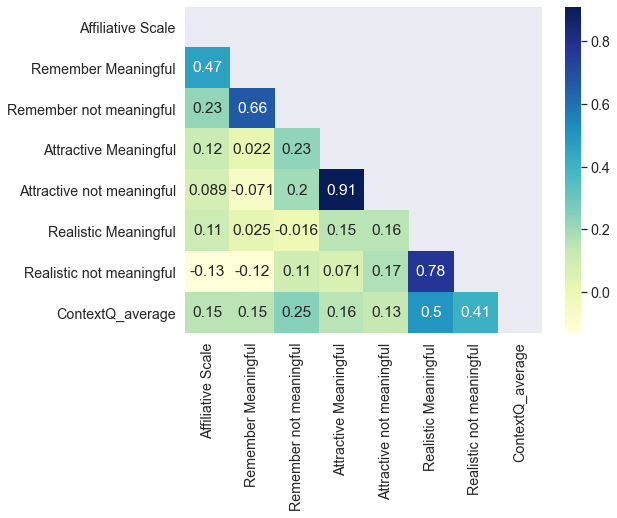

In [158]:
HumanAaffili = HumanAf[['AffiliativeQ_average', 'remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert','ContextQ_average' ]]
corrMatrix = HumanAaffili.corr()

fig, ax = plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", ax=ax, mask=mask)

ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);
ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='remember_action_likert', ylabel='AffiliativeQ_average'>

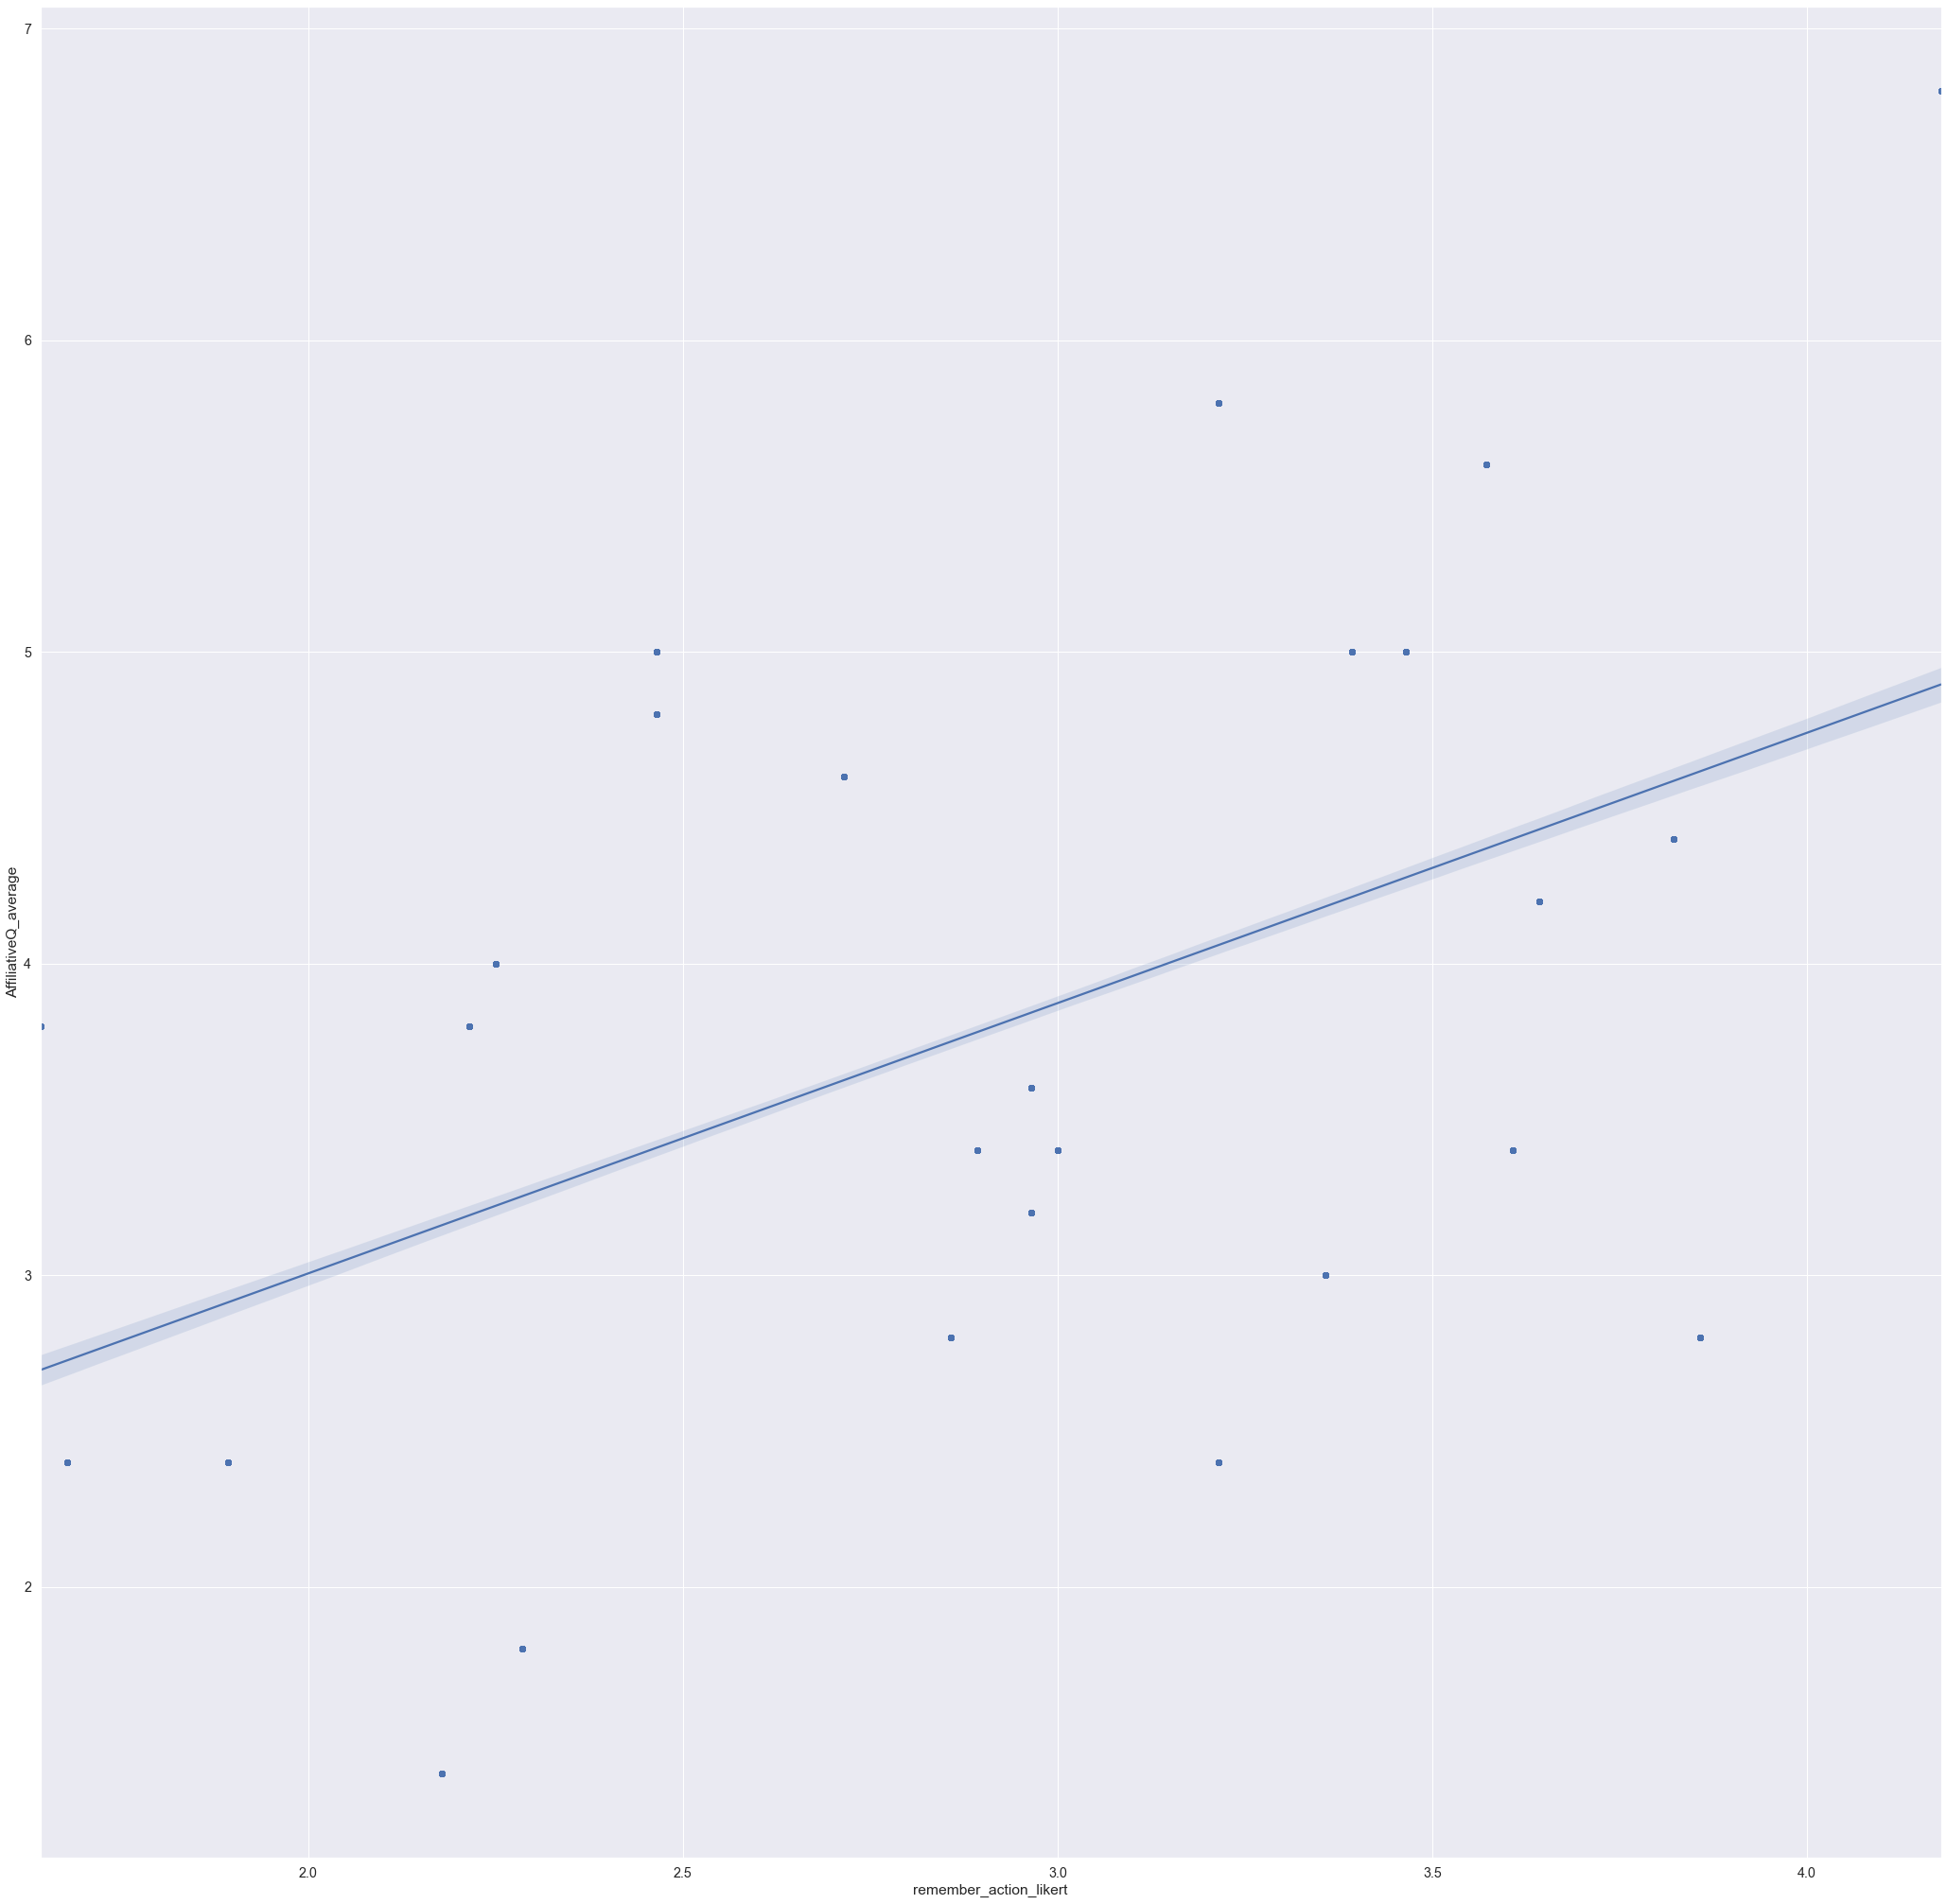

In [159]:
sns.regplot('remember_action_likert', 'AffiliativeQ_average', data= HumanAaffili )

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='realistic_standing_likert', ylabel='AffiliativeQ_average'>

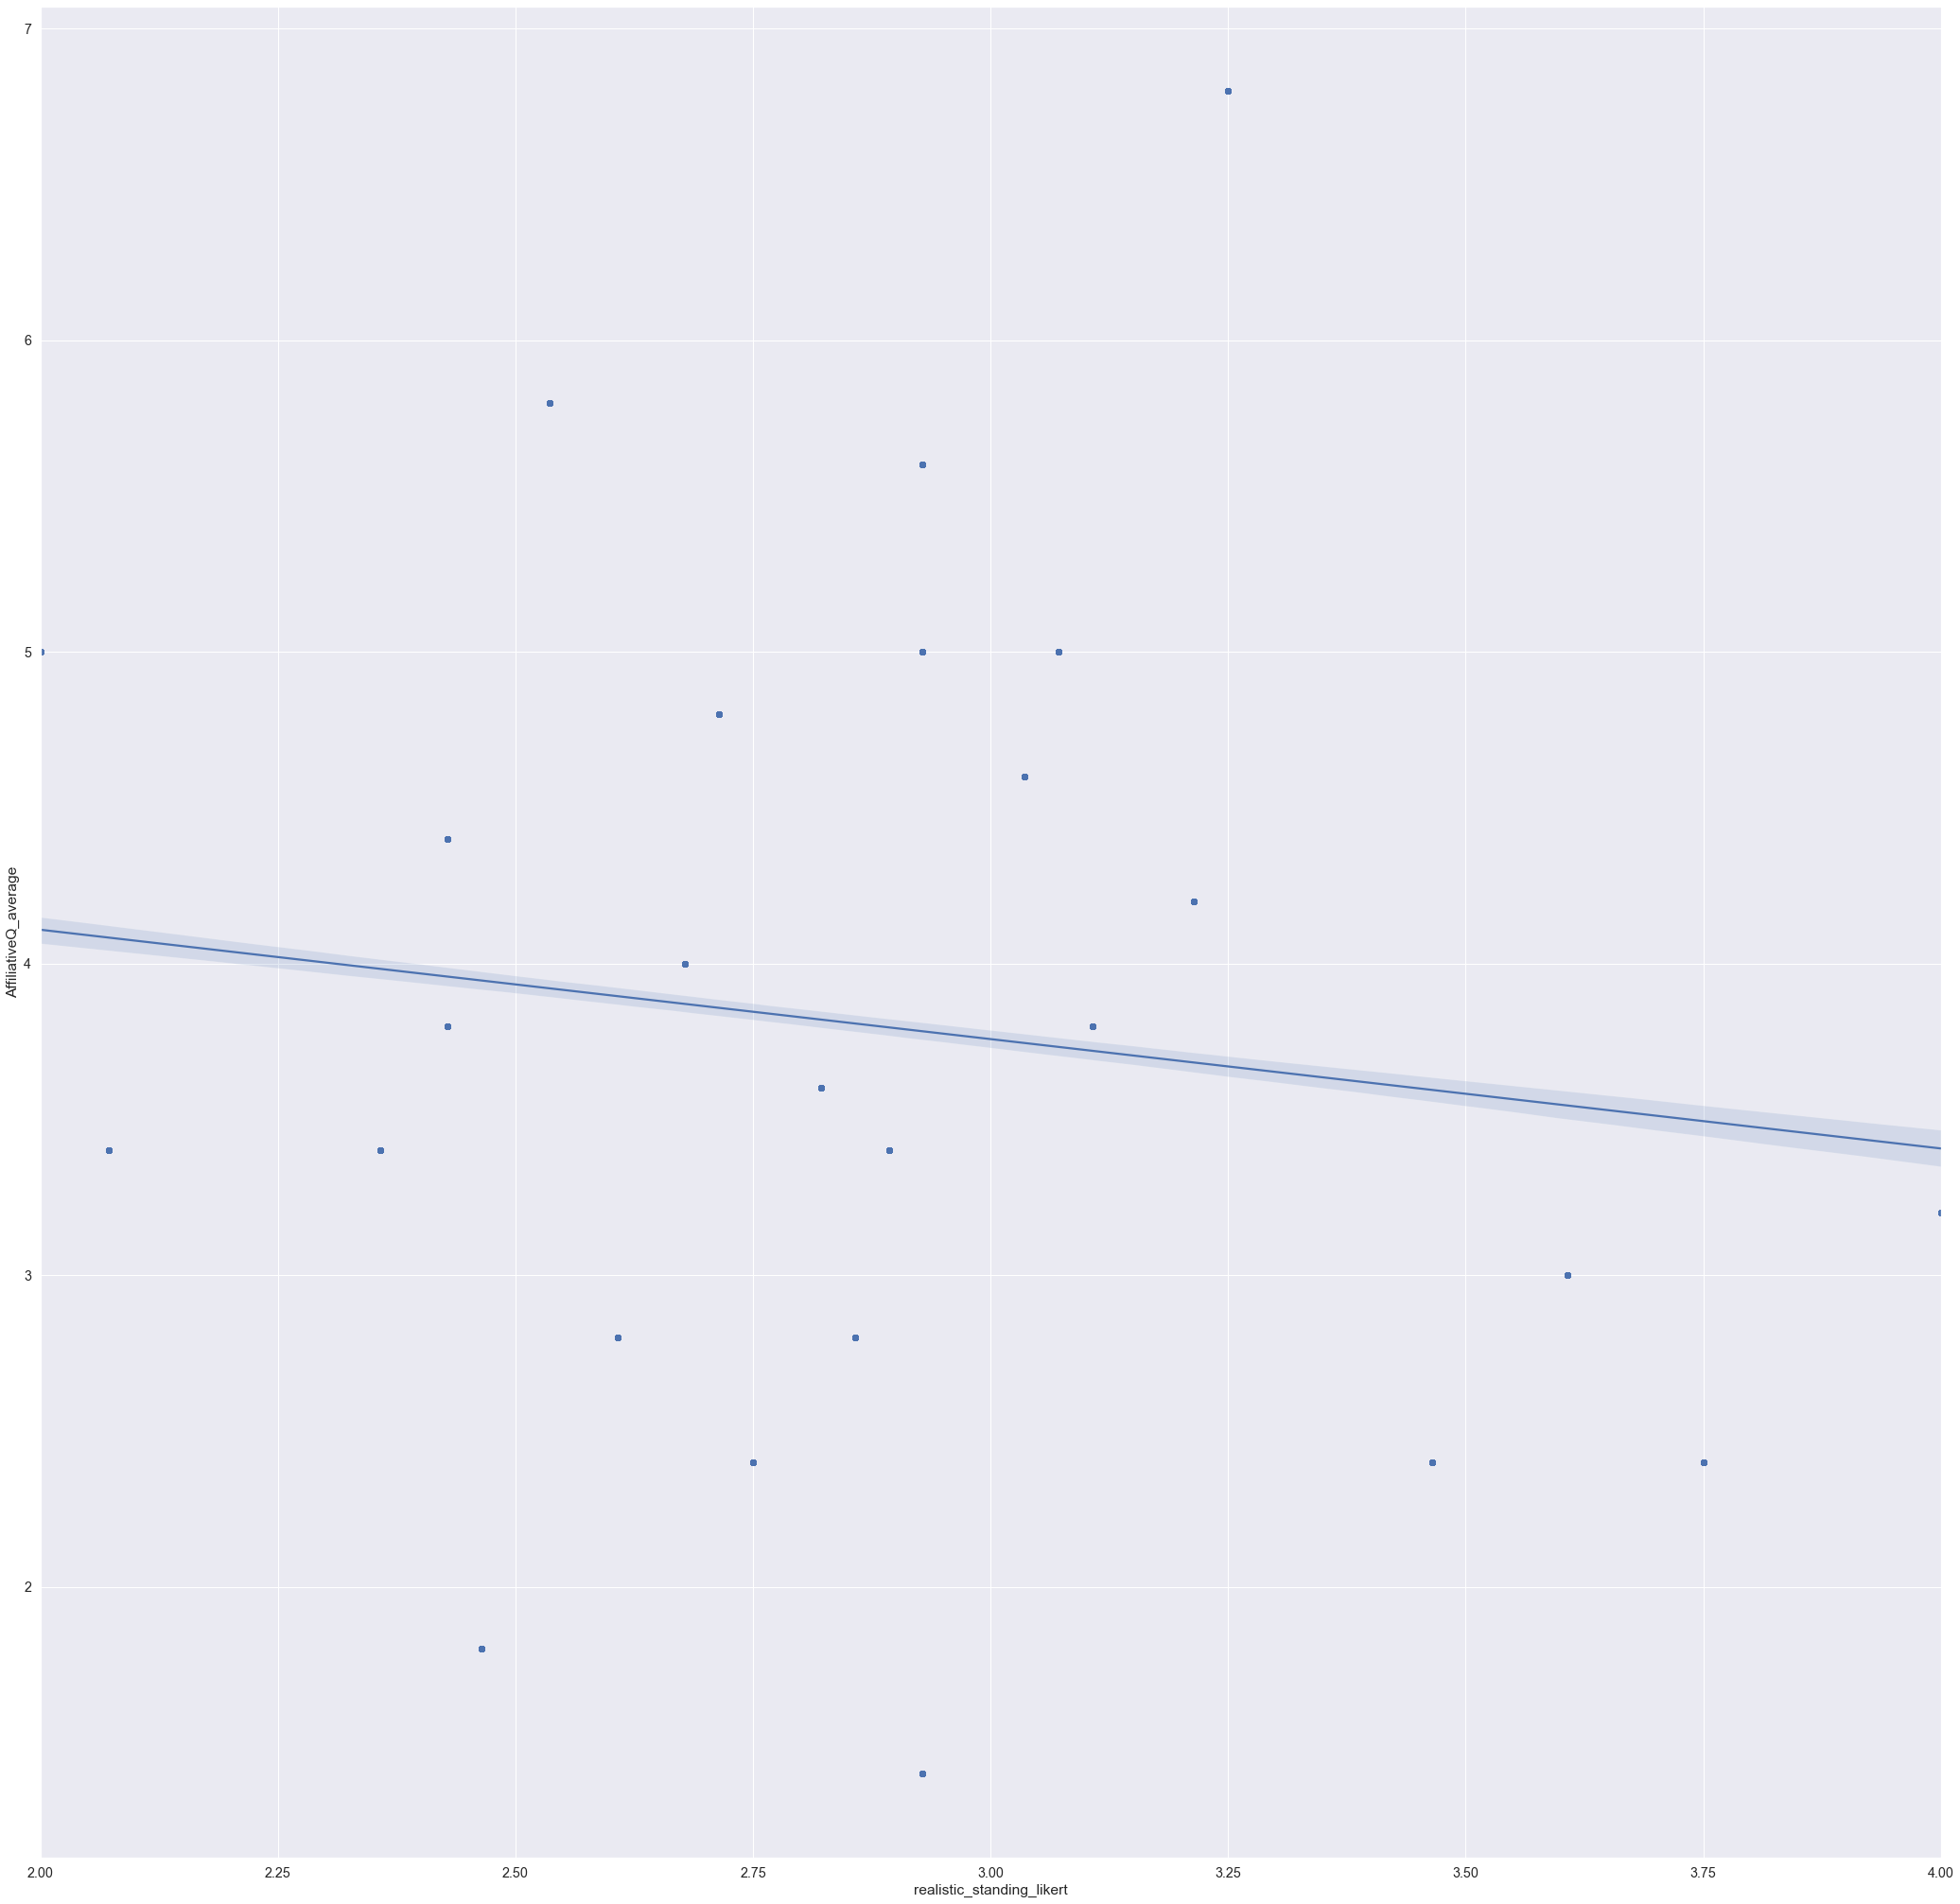

In [160]:
sns.regplot('realistic_standing_likert', 'AffiliativeQ_average', data= HumanAaffili )

In [161]:
import scipy.stats
r, p = scipy.stats.pearsonr(HumanAf.AffiliativeQ_average, HumanAf.realistic_standing_likert)
p

1.884651032741326e-34

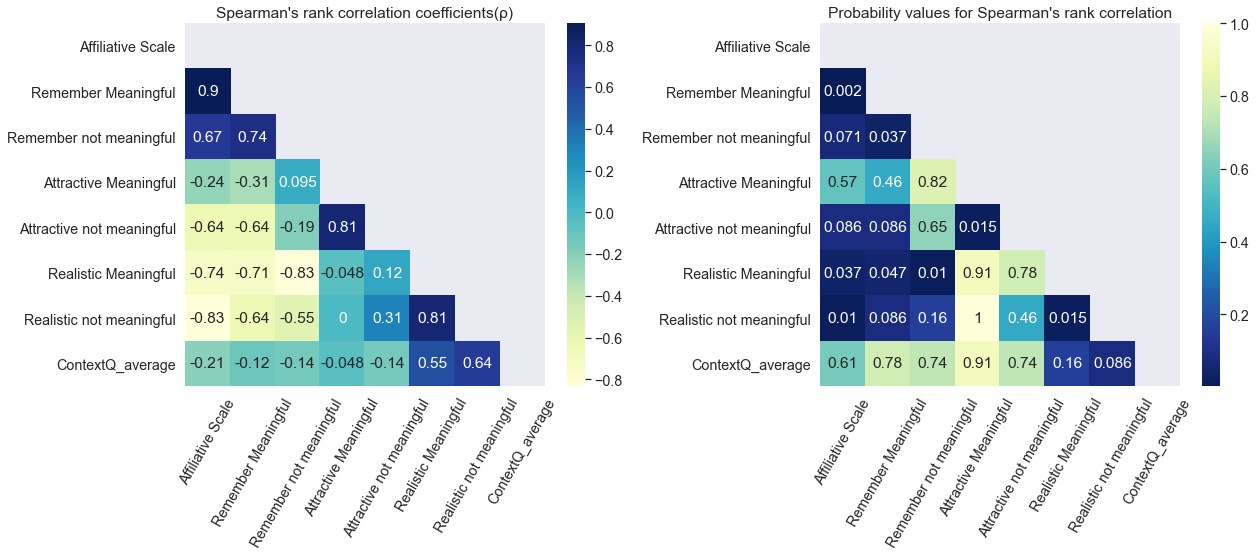

In [162]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm

fig, ax = plt.subplots(1,2)

cor, pval = stats.spearmanr(corrMatrix.T)
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")

for ax in ax.ravel():
    ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=60);
    ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=360);
plt.tight_layout()
plt.show()

In [163]:
HumanAf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8713 entries, 1 to 9051
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8713 non-null   int64  
 1   ID                                8713 non-null   object 
 2   Alter                             8713 non-null   float64
 3   Global                            8713 non-null   float64
 4   Overview                          8713 non-null   float64
 5   Cardinal                          8713 non-null   float64
 6   AffiliativeQ_average              8713 non-null   float64
 7   item3                             8713 non-null   float64
 8   ContextQ_average                  8713 non-null   float64
 9   remember_action_likert            8713 non-null   float64
 10  remember_standing_likert          8713 non-null   float64
 11  attractive_action_likert          8713 non-null   float64
 12  attrac

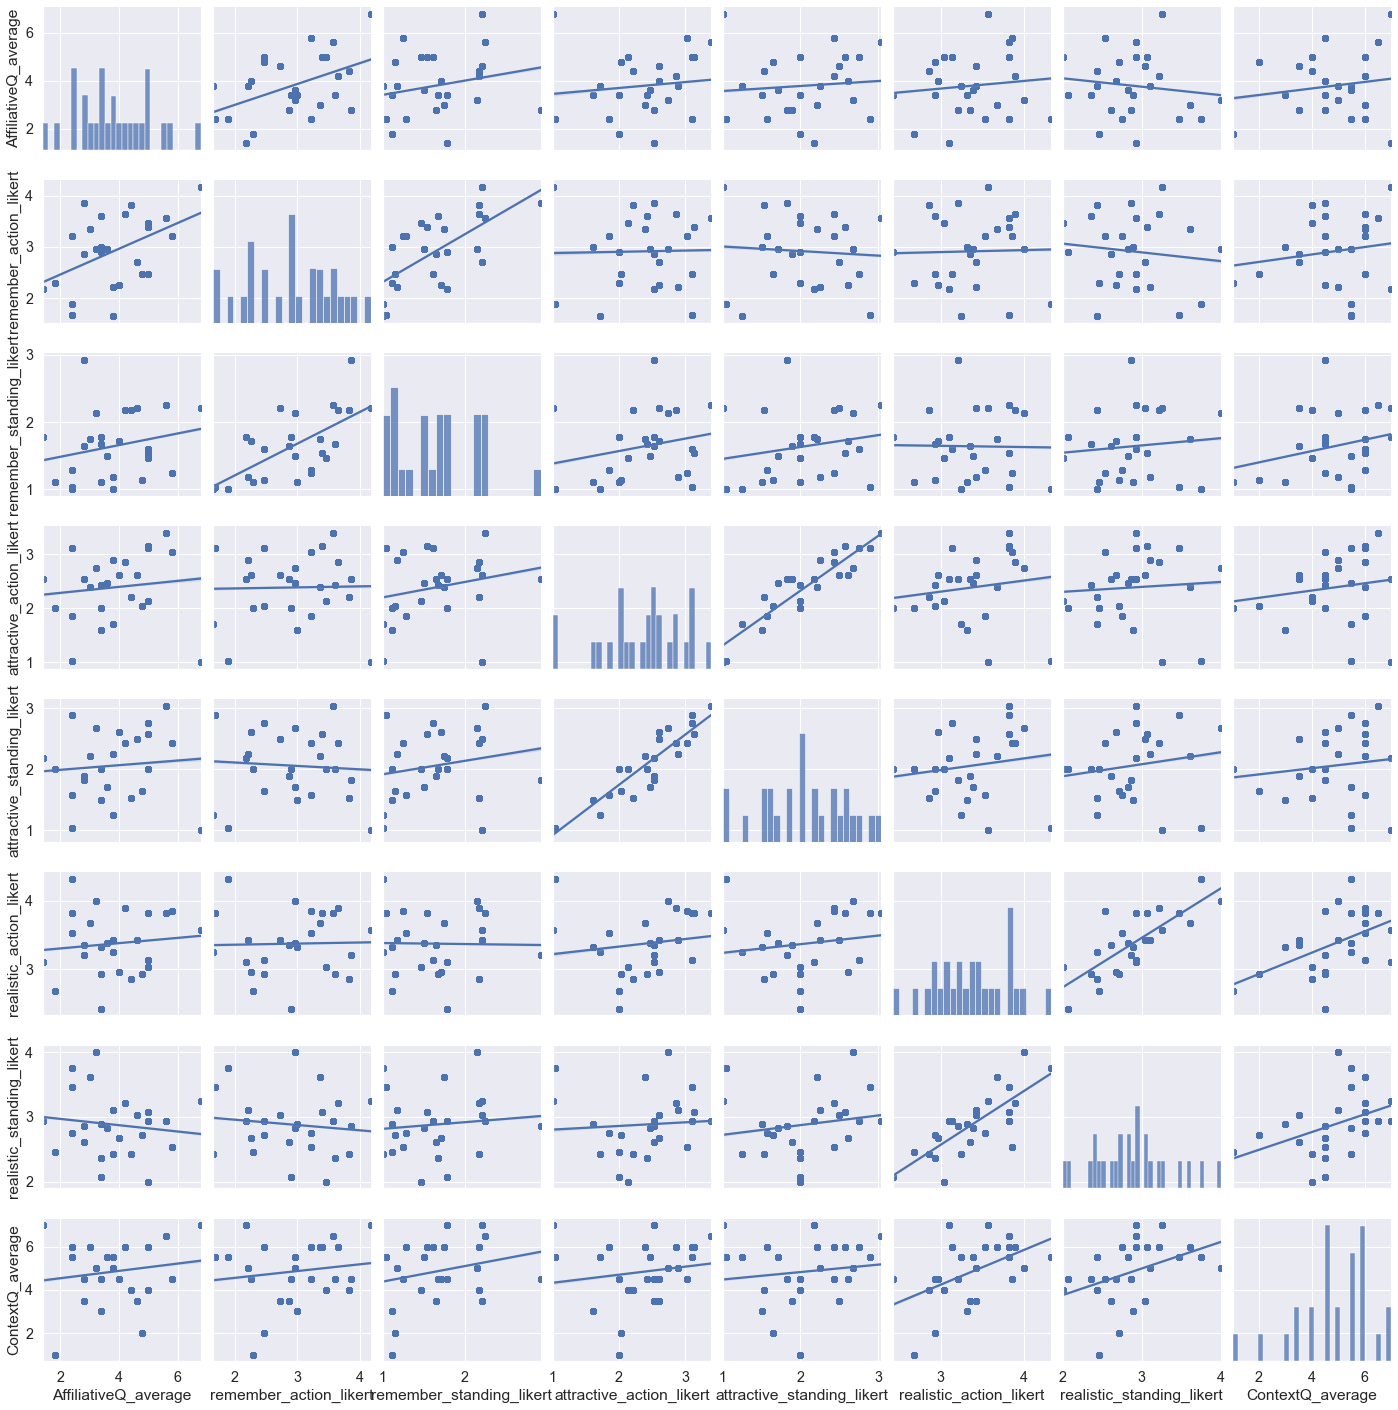

In [164]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

# with regression
sns.pairplot(HumanAaffili, kind="reg")
plt.show()